# Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.

# ANS ▶

- Clustering is a fundamental unsupervised learning technique used to group similar data points together based on certain characteristics or features. The basic concept of clustering involves partitioning a set of data points into clusters such that data points within the same cluster are more similar to each other than they are to data points in other clusters. Clustering algorithms aim to identify inherent patterns or structures in the data without prior knowledge of labels or categories.

Here are some examples of applications where clustering is useful:

  - Customer Segmentation: Clustering can be used in marketing to group customers based on their purchasing behavior, demographics, or preferences. This helps businesses tailor their marketing strategies for different customer segments.

  - Image Segmentation: In image processing, clustering is used to segment images into meaningful regions based on pixel intensity, color, texture, or other features. This is valuable in tasks like object recognition and medical image analysis.

  - Anomaly Detection: Clustering can be applied to detect anomalies or outliers in data. By clustering normal data points together, any data points that significantly deviate from these clusters can be flagged as anomalies, which is useful in fraud detection or fault monitoring systems.

  - Document Clustering: In natural language processing (NLP), clustering is used to group similar documents together based on their content or topics. This is useful for organizing large document collections, information retrieval, and topic modeling.

  - Genetic Clustering: In bioinformatics, clustering techniques are used to analyze gene expression data and identify patterns or clusters of genes that are co-expressed under certain conditions. This helps in understanding biological processes and disease mechanisms.

  - Recommendation Systems: Clustering can be used in collaborative filtering-based recommendation systems to group users or items with similar preferences. This allows for personalized recommendations based on the behavior of similar users or items.

  - Network Analysis: Clustering can be applied to analyze networks, such as social networks or communication networks, to identify communities or clusters of nodes with strong connections within the cluster and weak connections between clusters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [2]:
iris=load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
x=iris.data

In [5]:
y=iris.target

In [6]:
kmeans=KMeans(n_clusters=3,random_state=42)

In [7]:
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [8]:
cluster_centers=kmeans.cluster_centers_

In [9]:
labels=kmeans.labels_

In [10]:
iris_df=pd.DataFrame(x,columns=iris.feature_names)

In [11]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [12]:
iris_df['cluster']=labels

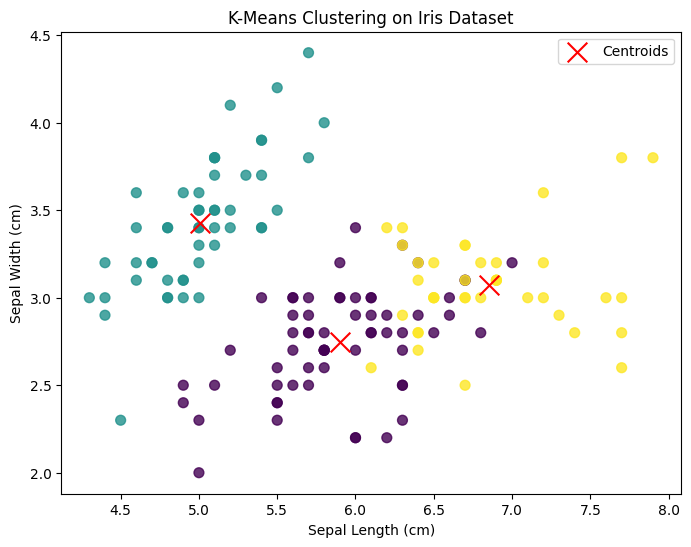

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis',s=50,alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

# Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and hierarchical clustering?

# ANS ▶

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that is particularly effective for identifying clusters of varying shapes and sizes in a dataset. Here's how DBSCAN differs from other clustering algorithms like k-means and hierarchical clustering:

- Cluster Shape and Size Handling:

  - DBSCAN: Can identify clusters of arbitrary shape and size. It does not assume clusters to be globular like k-means does.
  - k-means: Assumes clusters to be globular (spherical) and works well with clusters of similar size.
  - Hierarchical Clustering: Can handle clusters of varying shapes but may struggle with clusters of vastly different sizes.
# Handling Noise:

  - DBSCAN: Can identify and handle noise points, which are data points that do not belong to any cluster.
  - k-means: Does not handle noise well as it assigns every data point to a cluster, even if it doesn't fit well.
  - Hierarchical Clustering: Can be sensitive to noise as it tries to merge clusters based on distance.
# Parameter Sensitivity:

  - DBSCAN: Requires tuning of two main parameters: eps (maximum distance between points in the same neighborhood) and min_samples (minimum number of points required to form a dense region).
  - k-means: Requires specifying the number of clusters (k) beforehand, which can be a limitation if the true number of clusters is unknown.
  - Hierarchical Clustering: Can be sensitive to the choice of linkage method (e.g., single linkage, complete linkage) and the distance metric.
# Scalability:

  - DBSCAN: Works well with large datasets and is generally more scalable than hierarchical clustering, especially when using efficient implementations.
  - k-means: Can also be efficient for large datasets but may struggle with high-dimensional data or non-globular clusters.
  - Hierarchical Clustering: Can be computationally intensive, especially for large datasets or when using certain linkage methods.


# Cluster Density:


  - DBSCAN: Requires a minimum density of points to form a cluster, making it suitable for datasets with varying densities.
  - k-means: Assumes clusters of similar densities and may not perform well on datasets with varying cluster densities.
  - Hierarchical Clustering: Can handle varying cluster densities but may produce uneven clusters depending on the linkage method.

# DBSCAN

In [14]:
from sklearn.datasets  import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [15]:
iris=load_iris()

In [16]:
x=iris.data

In [17]:
dbscan=DBSCAN(eps=0.5,min_samples=5)

In [18]:
clusters=dbscan.fit_predict(x)

In [19]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

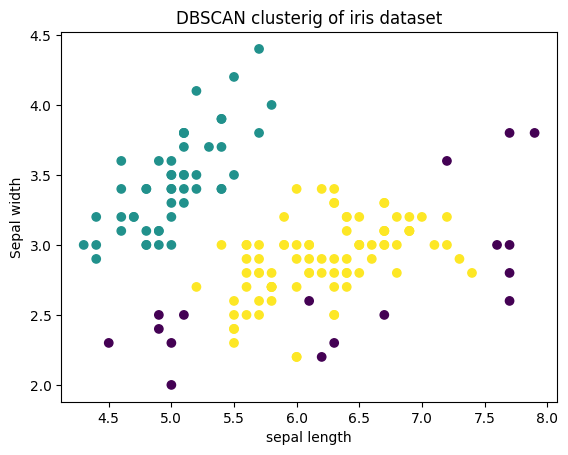

In [22]:
plt.scatter(x[:,0],x[:,1],c=clusters,cmap='viridis')
plt.ylabel("Sepal width")
plt.xlabel("sepal length")
plt.title("DBSCAN clusterig of iris dataset")
plt.show()

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# KMeans

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [25]:
kmeans=KMeans(n_clusters=3)

In [26]:
clusters=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


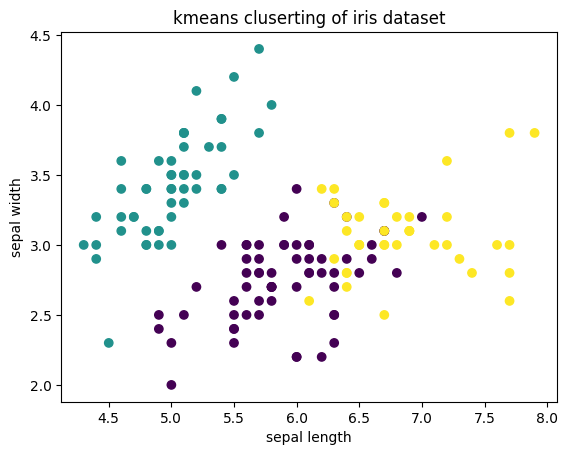

In [27]:
plt.scatter(x[:,0],x[:,1],c=clusters,cmap='viridis')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("kmeans cluserting of iris dataset")
plt.show()

# Hierarchical Clustering Example

In [28]:
from scipy.cluster.hierarchy import dendrogram , linkage
import matplotlib.pyplot as plt


In [29]:
z=linkage(x,method='complete')

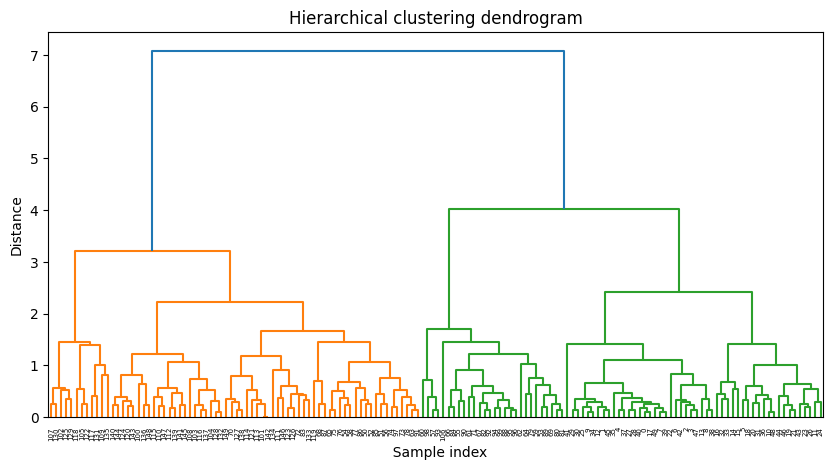

In [32]:
plt.figure(figsize=(10,5))
dendrogram(z)
plt.title("Hierarchical clustering dendrogram")
plt.xlabel("  Sample index")
plt.ylabel("Distance")
plt.show()

# Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN clustering?

# ANS ▶


# Determining the optimal values for the epsilon and minimum points parameters in DBSCAN clustering typically involves a process of experimentation and evaluation. Here are steps to help you find suitable values:

- Understanding DBSCAN Parameters:

 - Epsilon (eps): This parameter defines the maximum distance between two points for them to be considered as part of the same neighborhood.
Minimum Points (minPts): This parameter specifies the minimum number of points required to form a dense region (core point) in the dataset.


  - Initial Parameter Selection:Start by selecting initial values for epsilon and minPts. A common approach is to choose eps based on the distance distribution of the data points and minPts based on the expected density of clusters.
  - Visualizing Clusters:Use these initial parameters to perform DBSCAN clustering on your data.Visualize the resulting clusters to assess their quality. You can use scatter plots or other visualization techniques to observe cluster formations.
  - Adjusting Parameters:If the clusters are not well-defined or if there are too many noise points, consider adjusting the parameters Increase epsilon if clusters are merging or decrease it if clusters are splitting too much Adjust minPts to control the density requirement for cluster formation. Increasing minPts can lead to more compact clusters.


  - Evaluation Metrics: Use evaluation metrics such as silhouette score, Davies-Bouldin index, or visual inspection to assess the quality of clusters for different parameter combinations. Aim for parameter values that result in clusters with high intra-cluster similarity and low inter-cluster similarity.


  - Grid Search or Automated Techniques:For a systematic search, you can use grid search or automated techniques like the elbow method (based on the k-distance plot) to find optimal parameter values. Grid search involves testing multiple combinations of epsilon and minPts values and selecting the ones that yield the best clustering results based on chosen evaluation metrics.


  - Validation and Iteration:Validate the chosen parameters by checking if they generalize well to new data or different subsets of your dataset. Iterate the process if needed, refining parameter values based on feedback from cluster quality and performance metrics.





In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [34]:
iris=load_iris()

In [36]:
x=iris.data
y=iris.target

In [37]:
scaler=StandardScaler()

In [46]:
x_scaled=scaler.fit_transform(x)

In [39]:
eps_values=np.linspace(0.1,2.0,20)

In [40]:
eps_values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [43]:
num_clusters = []

In [41]:
silhouette_scores=[]

In [51]:


# Iterate over epsilon values and perform DBSCAN clustering
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(x_scaled)
    labels = dbscan.labels_

    # Check if more than one cluster is formed
    unique_labels = np.unique(labels)
    num_clusters.append(len(unique_labels))

    if len(unique_labels) > 1:
        # Calculate silhouette score for each clustering
        silhouette_scores.append(silhouette_score(x_scaled, labels))
    else:
        silhouette_scores.append(-1)  # Assign a low silhouette score if only one cluster is formed



# Q4. How does DBSCAN clustering handle outliers in a dataset?

# ANS:-

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering handles outliers differently from traditional clustering algorithms like k-means or hierarchical clustering. In DBSCAN, outliers are considered as noise points and are not assigned to any cluster. This is based on the density-based nature of DBSCAN, where clusters are formed based on the density of points in the dataset.

- Core Points: These are points that have at least "minPts" points (including the point itself) within a distance of "eps" (epsilon). Core points are at the heart of clusters.

- Border Points: These are points that are within the epsilon distance of a core point but do not have enough points around them to be considered core points themselves. Border points are part of clusters but not central to them.

- Noise Points (Outliers): These are points that are neither core points nor border points. They are typically isolated points or points with very few neighbors within epsilon distance. DBSCAN labels these points as noise or outliers and does not assign them to any cluster.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [55]:
iris=load_iris()

In [56]:
x=iris.data

In [57]:
y=iris.target

In [58]:
np.random.seed(0)

In [59]:
outliers_indices=np.random.choice(len(x),10,replace=False)

In [60]:
x_outliers=x[outliers_indices]+ np.random.normal(0,0.5,size=x[outliers_indices].shape)

In [61]:
x_combined = np.vstack((x, x_outliers))
y_combined = np.hstack((y, np.full(len(x_outliers), -1)))

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_combined)

In [63]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(x_scaled)
labels = dbscan.labels_

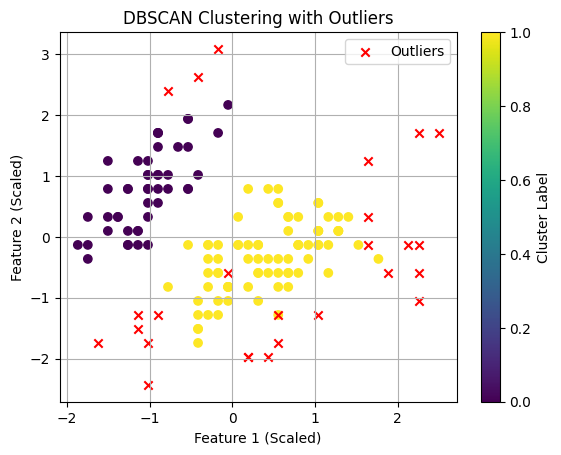

In [64]:
plt.scatter(x_scaled[labels != -1, 0], x_scaled[labels != -1, 1], c=labels[labels != -1], cmap='viridis')
plt.scatter(x_scaled[labels == -1, 0], x_scaled[labels == -1, 1], marker='x', color='red', label='Outliers')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('DBSCAN Clustering with Outliers')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()

# Q5. How does DBSCAN clustering differ from k-means clustering?

# ANS:-

# DBSCAN:

- Density-based clustering.
- Can identify clusters of arbitrary shape.
- Robust to outliers and noise points.
- Requires tuning parameters like epsilon (maximum distance between points in a cluster) and minPts (minimum number of points to form a dense region).
- Assigns outliers to a separate cluster or labels them as noise.
# K-means:

- Centroid-based clustering.
- Assumes spherical clusters of roughly equal size.
- Sensitive to outliers and noise, as every point is assigned to a cluster.
- Requires specifying the number of clusters (k) beforehand.
- Converges to local optima and depends on the initial placement of centroids.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN , KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [66]:
iris=load_iris()

In [67]:
x=iris.data

In [68]:
y=iris.target

In [69]:
scaler=StandardScaler()

In [70]:
x_scaled=scaler.fit_transform(x)

In [71]:
pca=PCA(n_components=2)

In [73]:
x_pca=pca.fit_transform(x_scaled)

In [74]:
dbscan=DBSCAN(eps=0.5,min_samples=5)

In [75]:
dbscan_labels=dbscan.fit_predict(x_scaled)

In [76]:
kmeans=KMeans(n_clusters=3,random_state=42)

In [77]:
kmeans_labels=kmeans.fit_predict(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


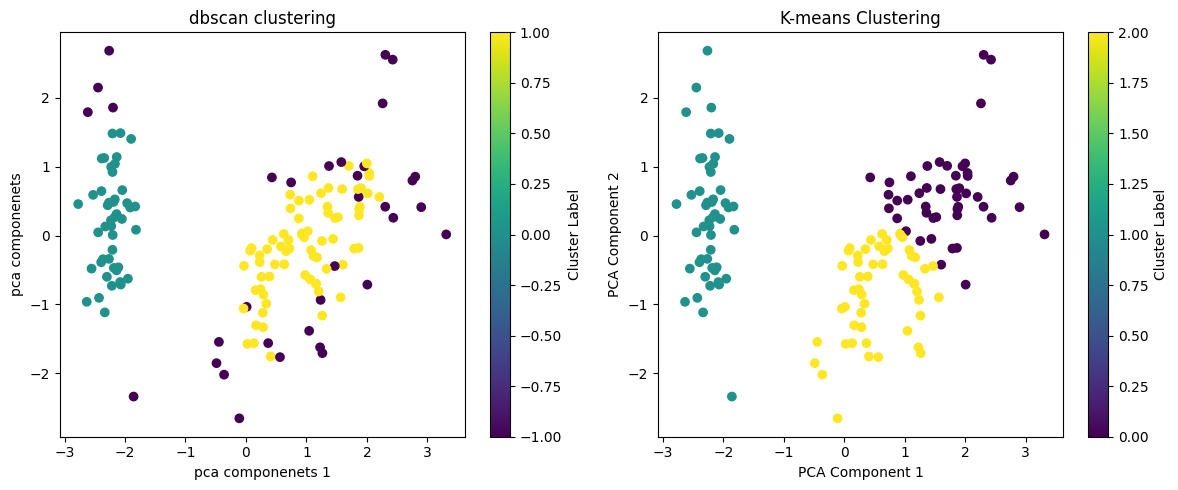

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_pca[:,0],x_pca[:,1],c=dbscan_labels,cmap='viridis')
plt.title("dbscan clustering")
plt.xlabel("pca componenets 1")
plt.ylabel("pca componenets")
plt.colorbar(label='Cluster Label')
plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

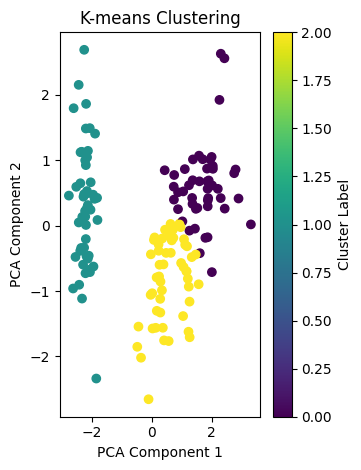

In [79]:
plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

# Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are some potential challenges?

# ANS ❎


Yes, DBSCAN clustering can be applied to datasets with high-dimensional feature spaces. However, there are some potential challenges associated with using DBSCAN in high-dimensional spaces:

Curse of Dimensionality: As the number of dimensions increases, the distance between points tends to become more uniform, which can affect the effectiveness of distance-based clustering algorithms like DBSCAN.

Density Estimation: Estimating the appropriate density threshold (epsilon) for clustering in high-dimensional spaces can be challenging, as the notion of "density" becomes more complex with increased dimensions.

Computational Complexity: DBSCAN's computational complexity is O(n^2)

n is the number of data points. In high-dimensional spaces with a large number of data points, the algorithm's performance may suffer.

Noise Sensitivity: DBSCAN may be more sensitive to noise in high-dimensional spaces, leading to less stable cluster assignments.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [83]:
digits=load_digits()

In [84]:
x=digits.data
y=digits.target

In [85]:
scaler=StandardScaler()


In [86]:
x_scaled=scaler.fit_transform(x)

In [87]:
pca=PCA(n_components=3)

In [88]:
x_pca=pca.fit_transform(x_scaled)

In [89]:
dbscan=DBSCAN(eps=3,min_samples=5)

In [90]:
dbscan.fit(x_pca)

DBSCAN(eps=3)

In [91]:
labels=dbscan.labels_

In [93]:
labels

array([0, 0, 0, ..., 0, 0, 0])

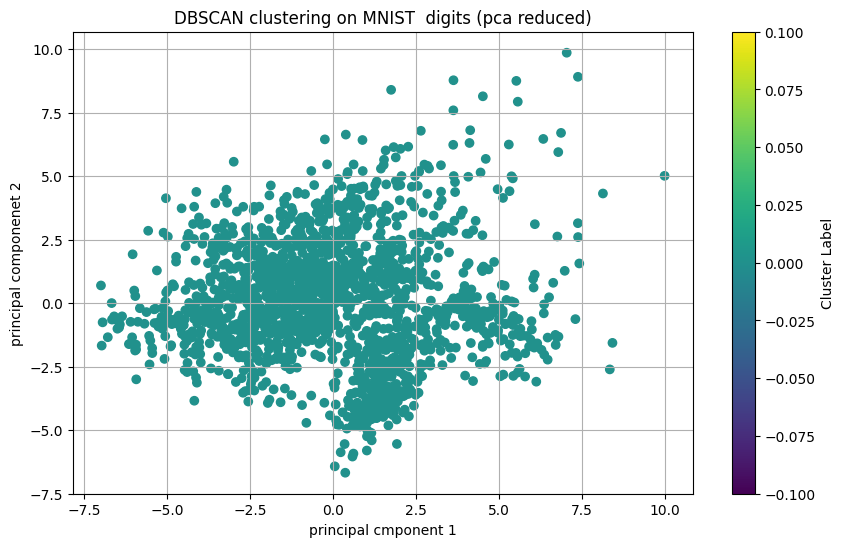

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='viridis')
plt.xlabel("principal cmponent 1")
plt.ylabel("principal componenet 2")
plt.title("DBSCAN clustering on MNIST  digits (pca reduced)")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

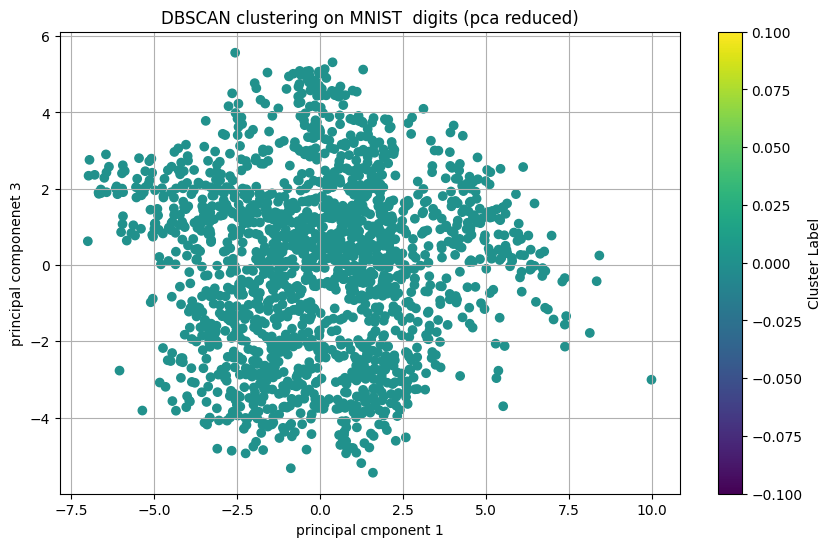

In [96]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,2],c=labels,cmap='viridis')
plt.xlabel("principal cmponent 1")
plt.ylabel("principal componenet 3")
plt.title("DBSCAN clustering on MNIST  digits (pca reduced)")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# Q7. How does DBSCAN clustering handle clusters with varying densities?

# ANS:-
# DBSCAN clustering handles clusters with varying densities by defining clusters based on dense regions of data points separated by sparse areas. It does this by distinguishing between core points, border points, and noise points:

- Core Points: These are data points within the dataset that have at least "minPts" neighboring points within a distance of "eps" (epsilon). Core points are indicative of dense regions in the dataset.

- Border Points: These points are not core points themselves but are within the epsilon neighborhood of a core point. They are part of a cluster but do not meet the density requirement to be considered core points.

- Noise Points: Data points that do not belong to any cluster are considered noise points. They do not have enough neighbors to be core points or are too far from any core point to be included in a cluster.

- DBSCAN algorithm identifies clusters by connecting core points and their directly reachable neighbors. It can handle clusters with varying densities by adjusting the epsilon parameter to accommodate different densities in different parts of the dataset.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [98]:
iris=load_iris()

In [99]:
x=iris.data
y=iris.target

In [100]:
scaler=StandardScaler()

In [101]:
x_scaled=scaler.fit_transform(x)

In [102]:
dbscan=DBSCAN(eps=0.5,min_samples=5)

In [103]:
dbscan.fit(x_scaled)

DBSCAN()

In [106]:
labels=dbscan.labels_

In [107]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)


In [108]:
print(f"Number of clusters : {n_clusters}")

Number of clusters : 2


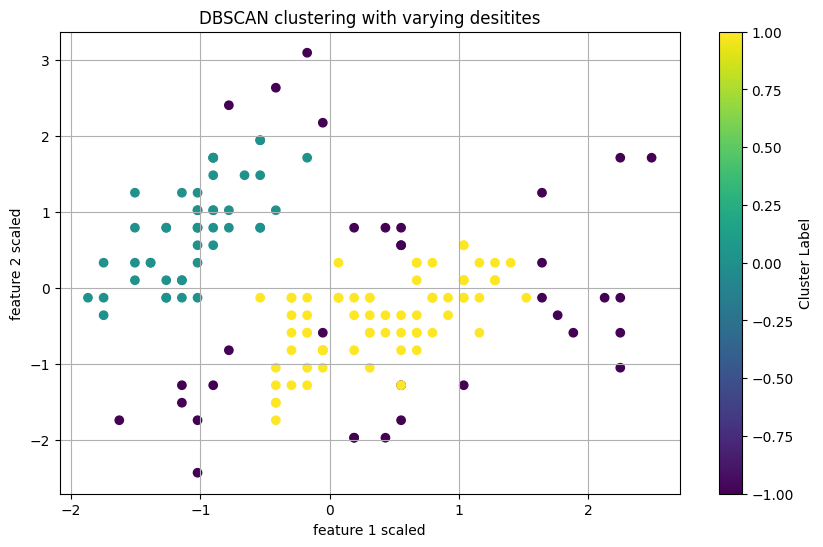

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=labels,cmap='viridis')
plt.xlabel("feature 1 scaled")
plt.ylabel("feature 2 scaled")
plt.title("DBSCAN clustering with varying desitites")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?

# ANS ▶


Some common evaluation metrics used to assess the quality of DBSCAN clustering results include:

Silhouette Score: Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Values range from -1 to 1, where a higher score indicates better clustering.

Davies-Bouldin Index: Computes the average similarity measure of each cluster with the cluster that is most similar to it. Lower values indicate better clustering.

Calinski-Harabasz Index (Variance Ratio Criterion): Computes the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values suggest better clustering.

Dunn Index: Measures the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance. Higher values indicate better clustering.

- Let's see the example of silhouette_score

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [111]:
iris=load_iris()

In [112]:
x=iris.data

In [113]:
y=iris.target

In [114]:
scaler=StandardScaler()

In [115]:
x_scaled=scaler.fit_transform(x)

In [116]:
optimal_eps=0.5

In [117]:
dbscan=DBSCAN(eps=optimal_eps,min_samples=5)
dbscan.fit(x_scaled)

DBSCAN()

In [119]:
labels=dbscan.labels_

In [120]:
silhouette=silhouette_score(x_scaled,labels)

In [121]:
print(f"Silhouette score is : {silhouette}")

Silhouette score is : 0.35651648142700726


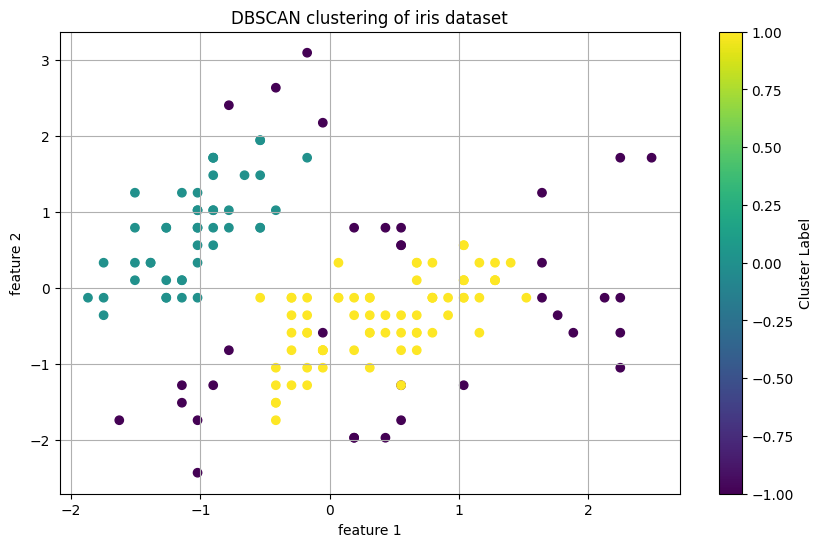

In [122]:
plt.figure(figsize=(10,6))
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=labels,cmap='viridis')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("DBSCAN clustering of iris dataset")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In this code:

We assume an optimal epsilon value (0.5) from previous analysis (you should replace this with the actual optimal value from your analysis).
We perform DBSCAN clustering with the optimal epsilon value and calculate the silhouette score as an evaluation metric.
The silhouette score is printed to assess the quality of the clustering results.
We visualize the clusters to observe the clustering pattern.